<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Maxwell_Boltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sp
from sympy import oo, exp, sin, pi
import matplotlib.pyplot as plt
import numpy as np
sp.init_printing()


# Maxwell-Boltzmann distribution

In [3]:
eps,m,T,K=sp.symbols('varepsilon,m,T,K',positive=True,real=True)
vx,vy,vz,fvx,fv=sp.symbols('v_x,v_y,v_z,f_{v_x},f_v',real=True)
kb=sp.symbols('k_B',constant=True,positive=True,real=True)

In [4]:
mbx=sp.Eq(fvx,K*sp.exp(-eps/kb/T))
mbx

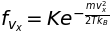

In [5]:
mbx=mbx.subs(eps,m*vx**2/2)
mbx

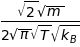

In [6]:
norm=sp.solve(sp.integrate(mbx.rhs,(vx,-oo,oo))-1,K)[0] # solve returns a list. There is only one solution so [0] will get it.
norm

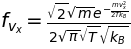

In [7]:
mbx=mbx.subs(K,norm)
mbx

Test normalization

In [8]:
sp.integrate(mbx.rhs,(vx,-oo,oo))

For three dimensions...

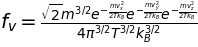

In [9]:
mb3d=sp.Eq(fv,mbx.rhs*mbx.subs(vx,vy).rhs*mbx.subs(vx,vz).rhs)
mb3d

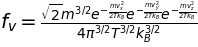

In [10]:
v=sp.symbols('v',real=True,positive=True)
mb3d.subs(vx**2+vy**2+vz**2,v**2)

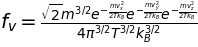

In [11]:
sp.powsimp(mb3d,force=True)

In [12]:
theta,phi=sp.symbols('theta, phi')
sp.integrate(sp.integrate(v**2*sp.sin(theta),(theta,0,sp.pi)),(phi,0,2*sp.pi))

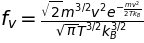

In [13]:
mb3d=sp.Eq(fv,mb3d.rhs.subs(vx,v/sp.sqrt(3)).subs(vy,v/sp.sqrt(3)).subs(vz,v/sp.sqrt(3))*4*sp.pi*v**2)
mb3d

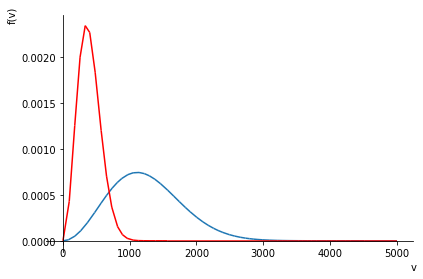

In [14]:
from sympy.plotting import plot
p=plot(mb3d.rhs.subs(kb,8.314).subs(T,298).subs(m,0.004).evalf(),(v,0,5000),show=False)
p.extend(plot(mb3d.rhs.subs(kb,8.314).subs(T,298).subs(m,0.040).evalf(),(v,0,5000),show=False,line_color='r'))
p.show()


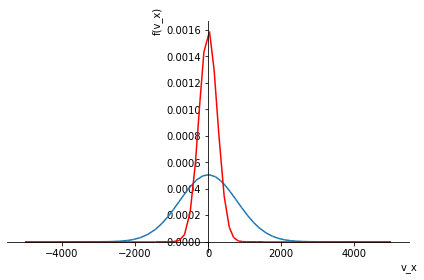

In [15]:
p1d=plot(mbx.rhs.subs(kb,8.314).subs(T,298).subs(m,0.004).evalf(),(vx,-5000,5000),show=False) # He at 298 K
p1d.extend(plot(mbx.rhs.subs(kb,8.314).subs(T,298).subs(m,0.040).evalf(),(vx,-5000,5000),show=False,line_color='r')) # Ar at 298 K
p1d.show()

# Averages
Now that we a distribution function that gives the fraction of molecules going each speed, we can use it to get average values.

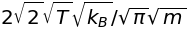

In [29]:
v_avg=  sp.integrate(mb3d.rhs*v,(v,0,oo)) # average v
v_avg

In [17]:
sp.integrate(mb3d.rhs*v**2,(v,0,oo)) # average v**2

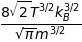

In [18]:
sp.integrate(mb3d.rhs*v**3,(v,0,oo)) # average v**3

In [19]:
sp.integrate(mb3d.rhs*m*v**2/2,(v,0,oo)) # average kinetic energy

In [20]:
vx_avg=sp.integrate(mbx.rhs*vx,(vx,-oo,oo)) # average v on x-axis
vx_avg

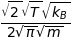

In [24]:
vx_avg_plus=sp.integrate(mbx.rhs*vx,(vx,0,oo)) # average v on + x-axis
vx_avg_plus

In [25]:
vx_sqrd=sp.integrate(mbx.rhs*vx**2,(vx,-oo,oo)) # average squared on x-axis
vx_sqrd

In [26]:
Ek_avg=sp.integrate(mbx.rhs*vx**2*m/2,(vx,-oo,oo)) # average kinetic energy on x-axis
Ek_avg

# Collision Frequncy


In [30]:
cs,V,N1=sp.symbols('sigma, V, N_1',nonnegative=True,real=True)

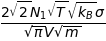

In [31]:
Z1=cs*v_avg*N1/V
Z1

In [35]:
round(Z1.subs(N1,6e23).subs(V,.024).subs(T,298).subs(cs,pi*140e-12**2).subs(kb,1.38e-23).subs(m,0.040/6e23).evalf(),2)